In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

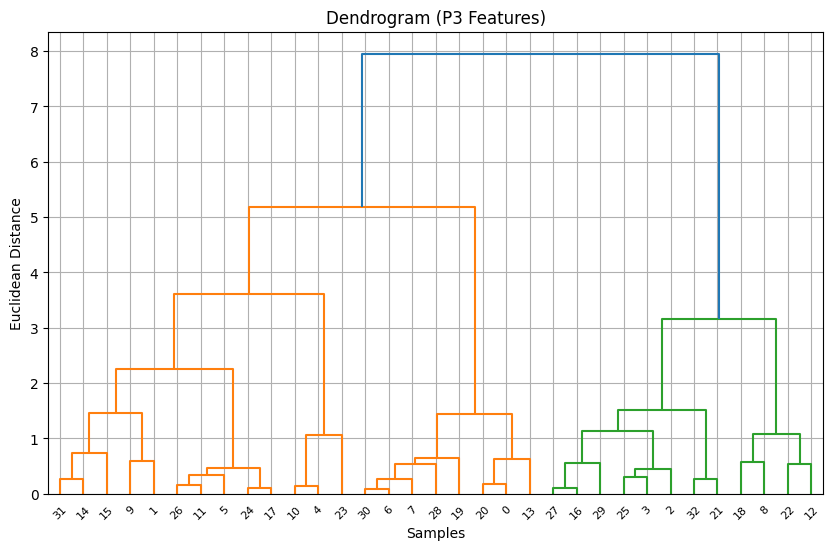

In [3]:
# Load the ERP dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/erp_features.csv')

# Create save directory
save_path = '/content/drive/MyDrive/hierarchical_clustering_P3'
os.makedirs(save_path, exist_ok=True)

# Extract P3 features
features = df[['Latency_P3 (ms)', 'Amplitude_P3 (µV)']].copy()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Save scaler
import joblib
joblib.dump(scaler, f'{save_path}/scaler_P3.pkl')

# Plot dendrogram
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram (P3 Features)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.savefig(f'{save_path}/dendrogram_P3.png')
plt.show()

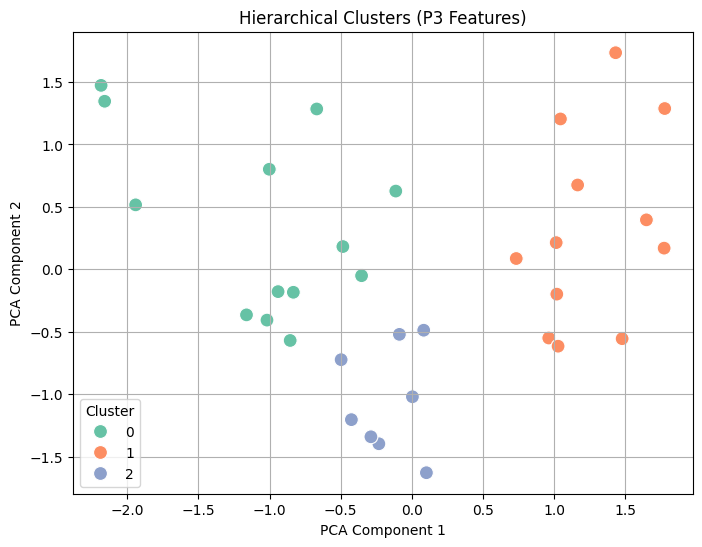

In [4]:
# Choose number of clusters after analyzing the dendrogram
n_clusters = 3

# Agglomerative clustering
agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg_clust.fit_predict(scaled_features)

# Add cluster labels
df['Cluster_P3_Hierarchical'] = clusters

# Save clustered dataset
df.to_csv(f'{save_path}/clustered_P3.csv', index=False)

# Evaluate clustering
sil_score = silhouette_score(scaled_features, clusters)
dbi_score = davies_bouldin_score(scaled_features, clusters)

# Save evaluation
with open(f'{save_path}/evaluation_P3.txt', 'w') as f:
    f.write(f'Silhouette Score: {sil_score:.4f}\n')
    f.write(f'Davies-Bouldin Index: {dbi_score:.4f}\n')

# Optional PCA visualization (even though 2D, just to match style)
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Hierarchical Clusters (P3 Features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(f'{save_path}/cluster_plot_P3.png')
plt.show()

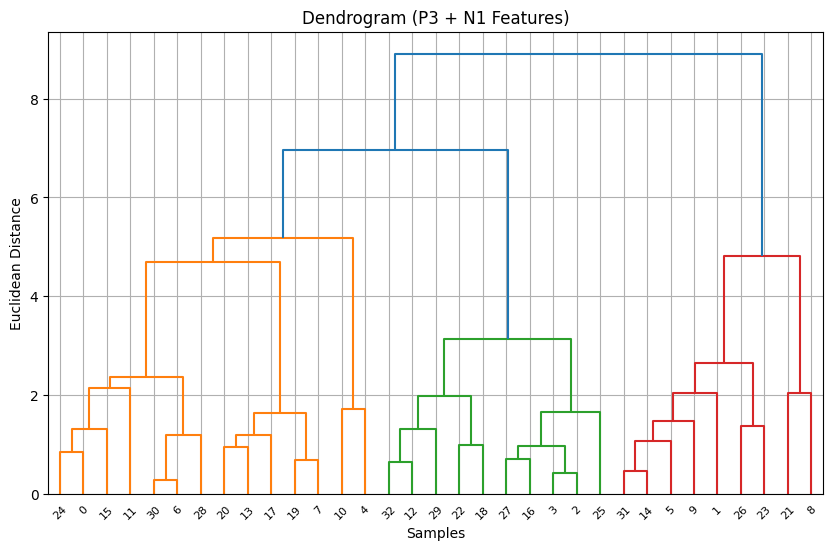

In [5]:
# Load the ERP dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/erp_features.csv')

# Create save directory
save_path = '/content/drive/MyDrive/hierarchical_clustering_P3_N1'
os.makedirs(save_path, exist_ok=True)

# Extract P3 + N1 features
features = df[['Latency_P3 (ms)', 'Amplitude_P3 (µV)', 'Latency_N1 (ms)', 'Amplitude_N1 (µV)']].copy()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Save scaler
import joblib
joblib.dump(scaler, f'{save_path}/scaler_P3_N1.pkl')

# Plot dendrogram
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram (P3 + N1 Features)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.savefig(f'{save_path}/dendrogram_P3_N1.png')
plt.show()

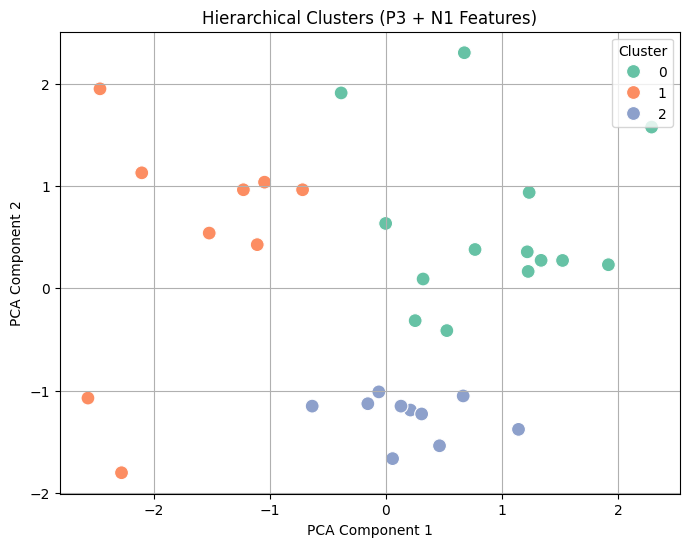

In [6]:
# Choose number of clusters after analyzing the dendrogram
n_clusters = 3

# Agglomerative clustering
agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg_clust.fit_predict(scaled_features)

# Add cluster labels
df['Cluster_P3N1_Hierarchical'] = clusters

# Save clustered dataset
df.to_csv(f'{save_path}/clustered_P3_N1.csv', index=False)

# Evaluate clustering
sil_score = silhouette_score(scaled_features, clusters)
dbi_score = davies_bouldin_score(scaled_features, clusters)

# Save evaluation
with open(f'{save_path}/evaluation_P3_N1.txt', 'w') as f:
    f.write(f'Silhouette Score: {sil_score:.4f}\n')
    f.write(f'Davies-Bouldin Index: {dbi_score:.4f}\n')

# PCA visualization (to reduce to 2D for plot)
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Hierarchical Clusters (P3 + N1 Features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(f'{save_path}/cluster_plot_P3_N1.png')
plt.show()

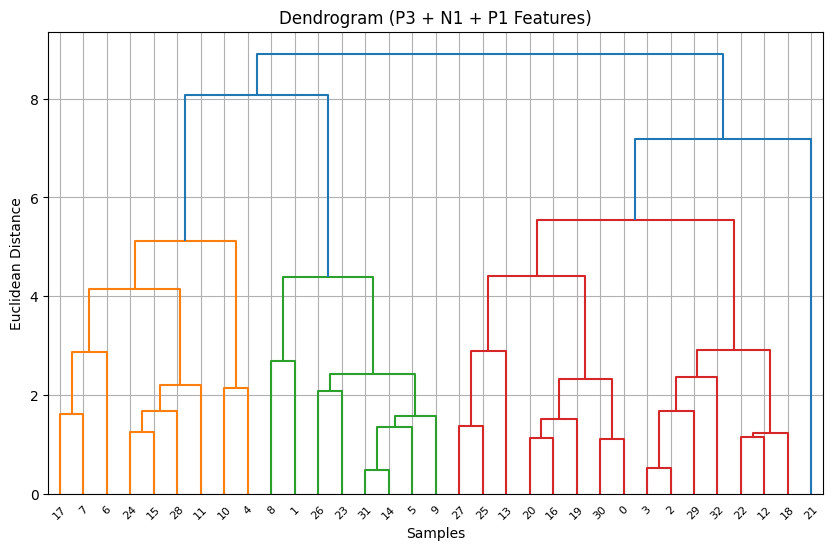

In [7]:
# Load ERP dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/erp_features.csv')

# Create save directory
save_path = '/content/drive/MyDrive/hierarchical_clustering_P3_N1_P1'
os.makedirs(save_path, exist_ok=True)

# Select ERP features: P3, N1, and P1
features = df[['Latency_P3 (ms)', 'Amplitude_P3 (µV)',
               'Latency_N1 (ms)', 'Amplitude_N1 (µV)',
               'Latency_P1 (ms)', 'Amplitude_P1 (µV)']].copy()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Save scaler
import joblib
joblib.dump(scaler, f'{save_path}/scaler_P3_N1_P1.pkl')

# Plot dendrogram
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram (P3 + N1 + P1 Features)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.savefig(f'{save_path}/dendrogram_P3_N1_P1.png')
plt.show()

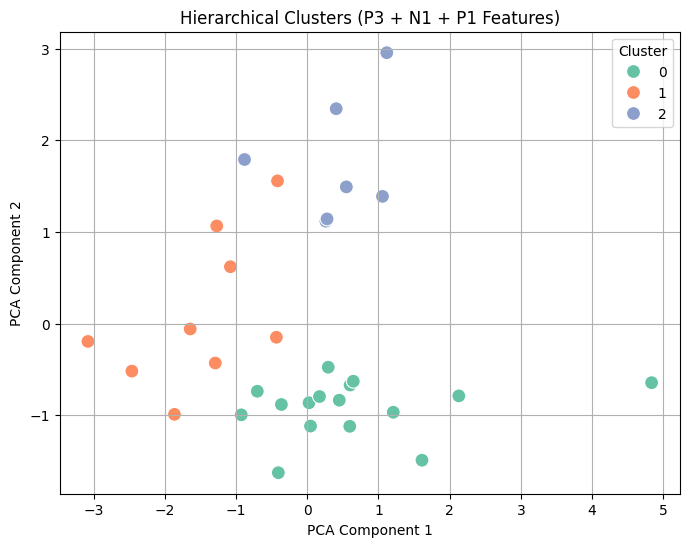

In [8]:
# Number of clusters from dendrogram observation
n_clusters = 3

# Perform Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg_clust.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster_P3_N1_P1_Hierarchical'] = clusters

# Save clustered dataset
df.to_csv(f'{save_path}/clustered_P3_N1_P1.csv', index=False)

# Evaluate clustering
sil_score = silhouette_score(scaled_features, clusters)
dbi_score = davies_bouldin_score(scaled_features, clusters)

# Save evaluation scores
with open(f'{save_path}/evaluation_P3_N1_P1.txt', 'w') as f:
    f.write(f'Silhouette Score: {sil_score:.4f}\n')
    f.write(f'Davies-Bouldin Index: {dbi_score:.4f}\n')

# PCA Visualization (just for plot styling)
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

# Plot cluster visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Hierarchical Clusters (P3 + N1 + P1 Features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(f'{save_path}/cluster_plot_P3_N1_P1.png')
plt.show()